<a href="https://colab.research.google.com/github/Anil-Chalumuri/TransferLearning/blob/main/Transfer_Learning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 1s 0us/step


In [11]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/train/*')

In [13]:
folders

['/content/drive/MyDrive/Datasets/train/cat',
 '/content/drive/MyDrive/Datasets/train/dog']

In [14]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [16]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 25000 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1012 images belonging to 2 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
782/782 [==============================] - 6957s 9s/step - loss: 0.3577 - accuracy: 0.8546 - val_loss: 0.2032 - val_accuracy: 0.9249
Epoch 2/50
782/782 [==============================] - 395s 504ms/step - loss: 0.2185 - accuracy: 0.9158 - val_loss: 0.2168 - val_accuracy: 0.9279
Epoch 3/50
782/782 [==============================] - 393s 503ms/step - loss: 0.1991 - accuracy: 0.9239 - val_loss: 0.2531 - val_accuracy: 0.9358
Epoch 4/50
782/782 [==============================] - 390s 499ms/step - loss: 0.1858 - accuracy: 0.9324 - val_loss: 0.2597 - val_accuracy: 0.9219
Epoch 5/50
782/782 [==============================] - 389s 497ms/step - loss: 0.1947 - accuracy: 0.9313 - val_loss: 0.3341 - val_accuracy: 0.9140
Epoch 6/50
782/782 [==============================] - 392s 501ms/step - loss: 0.1819 - accuracy: 0.9354 - val_loss: 0.2375 - val_accuracy: 0.9358
Epoch 7/50
782/782 [==============================] - 390s 498ms/step - loss: 0.1857 - accuracy: 0.9367 - val_loss: 0.3251 - v

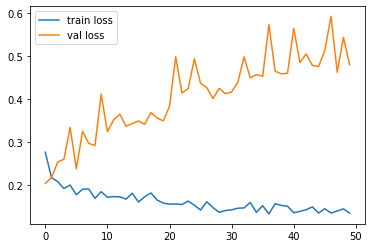

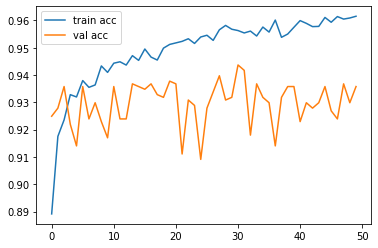

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [24]:
model.save('/content/drive/MyDrive/Datasets/model_vgg16.h5')

In [25]:

y_pred = model.predict(test_set)


In [26]:
y_pred

array([[1.0000000e+00, 1.1690154e-12],
       [3.5236767e-25, 1.0000000e+00],
       [1.5937049e-36, 1.0000000e+00],
       ...,
       [1.6170435e-13, 1.0000000e+00],
       [1.0000000e+00, 2.0433049e-16],
       [9.9999881e-01, 1.1938378e-06]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [10]:
#model=load_model('model_resnet50.h5')
model=load_model('model_vgg16.h5')

OSError: ignored

In [11]:

model=load_model('/content/drive/MyDrive/Datasets/model_vgg16.h5')

NameError: ignored

In [52]:
img=image.load_img('/content/drive/MyDrive/Datasets/test/cat/125.jpg',target_size=(224,224))



In [53]:
x=image.img_to_array(img)
x

array([[[199., 199., 201.],
        [219., 219., 221.],
        [211., 211., 213.],
        ...,
        [109.,  92.,  66.],
        [134., 118.,  93.],
        [ 55.,  39.,  14.]],

       [[211., 211., 213.],
        [214., 214., 216.],
        [210., 210., 212.],
        ...,
        [ 98.,  81.,  55.],
        [ 83.,  67.,  42.],
        [103.,  87.,  62.]],

       [[201., 201., 203.],
        [209., 209., 211.],
        [208., 208., 210.],
        ...,
        [102.,  85.,  59.],
        [109.,  93.,  68.],
        [ 99.,  83.,  58.]],

       ...,

       [[249., 246., 241.],
        [243., 242., 237.],
        [232., 233., 228.],
        ...,
        [242., 243., 235.],
        [234., 235., 230.],
        [238., 238., 240.]],

       [[245., 242., 237.],
        [240., 239., 234.],
        [230., 231., 226.],
        ...,
        [243., 245., 232.],
        [233., 235., 224.],
        [233., 234., 228.]],

       [[241., 238., 233.],
        [239., 238., 233.],
        [232., 2

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255

In [56]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [57]:
model.predict(img_data)

array([[9.999902e-01, 9.821530e-06]], dtype=float32)

In [58]:
a=np.argmax(model.predict(img_data), axis=1)

In [59]:
print(a)

[0]


In [60]:
a==1

array([False])

In [61]:
a==0

array([ True])